<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [32]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [33]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-11-04 18:28:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.3MB/s    in 2.8s    

2025-11-04 18:28:33 (55.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [34]:
##Write your code here
df['Age'] = df['Age'].replace('Under 18 years old', '15-18 years old')
df['Age'] = df['Age'].replace('65 years or older', '65-80 years old')
dfage = df.loc[df.Age != 'Prefer not to say'] 
dfage.Age.unique() 

##Write your code here
def convert_age_range(age_range):
    ar = age_range.split('y')[0]
    start, end = map(int, ar.split('-'))
    return (start + end) / 2

# Step 2: Apply it to the Age column
dfage['Age_numeric'] = dfage['Age'].map(convert_age_range) 

/tmp/ipykernel_310/3337466525.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfage['Age_numeric'] = dfage['Age'].map(convert_age_range)


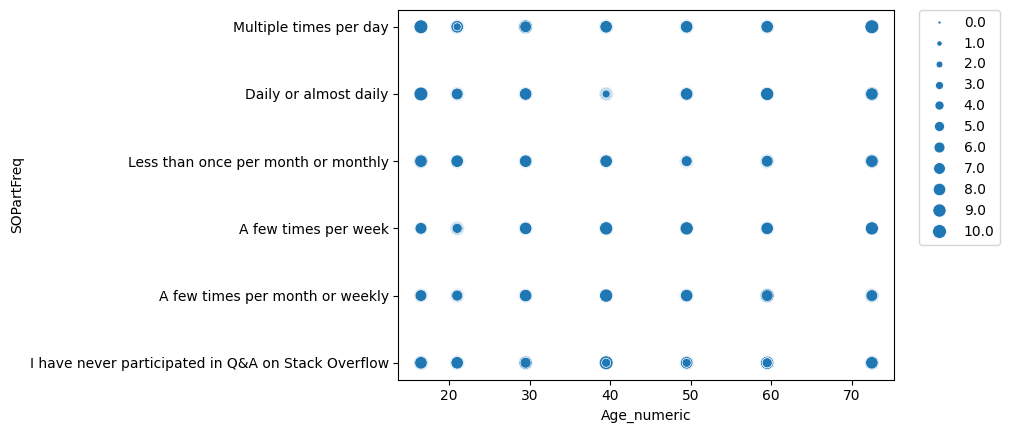

In [35]:
sns.scatterplot(x='Age_numeric', y='SOPartFreq', size='JobSat', data=dfage,
                    sizes=(5, 100), # Optional: set min and max bubble size
                    legend='full') # Optional: show legend for sizes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
plt.show() 

/tmp/ipykernel_310/17127783.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


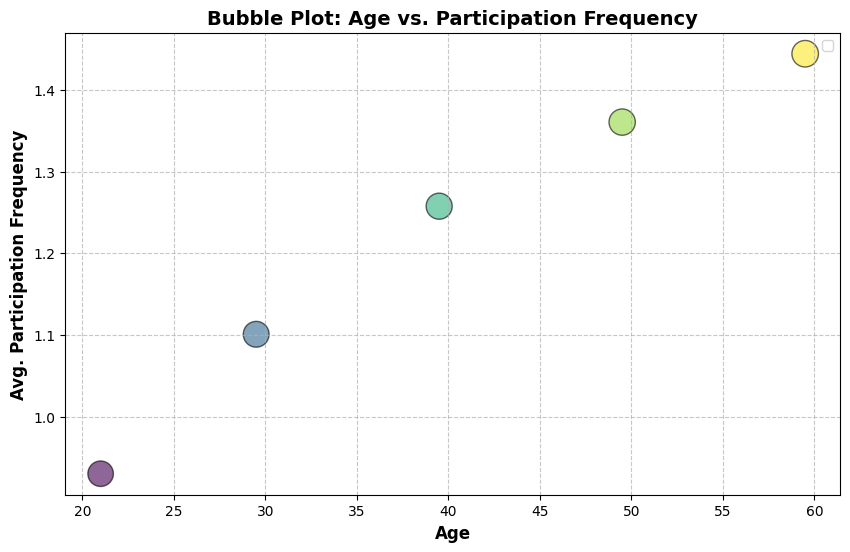

In [36]:
df1 = dfage[["Age", "SOPartFreq", "JobSat"]].copy()
# Define mappings for Age and SOPartFreq
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

so_part_freq_mapping = {
    "I have never participated in Q&A on Stack Overflow": 0,
    "Less than once per month or monthly": 1,
    "A few times per month or weekly": 2,
    "A few times per week": 3,
    "Daily or almost daily": 4,
    "Multiple times per day": 5
}

# Apply mappings
df1["AgeNumeric"] = df1["Age"].map(age_mapping)
df1["SOPartFreqNumeric"] = df1["SOPartFreq"].map(so_part_freq_mapping)

# Ensure JobSat is numeric
df1["JobSat"] = pd.to_numeric(df1["JobSat"], errors="coerce")

# Drop NaNs
df_filtered1 = df1.dropna(subset=["AgeNumeric", "SOPartFreqNumeric", "JobSat"])

# Aggregate by age
df_bubble = df_filtered1.groupby("AgeNumeric").agg(
    {"SOPartFreqNumeric": "mean", "JobSat": "mean"}
).reset_index()

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_bubble["AgeNumeric"], df_bubble["SOPartFreqNumeric"], 
            s=df_bubble["JobSat"] * 50,  # Scale bubbles based on JobSat
            alpha=0.6, edgecolors="black", c=df_bubble["SOPartFreqNumeric"])

# Labels and title
plt.xlabel("Age", fontsize=12, fontweight="bold")
plt.ylabel("Avg. Participation Frequency", fontsize=12, fontweight="bold")
plt.title("Bubble Plot: Age vs. Participation Frequency", fontsize=14, fontweight="bold")

# Set x-ticks to match mapped age values
#plt.xticks(df_bubble["AgeNumeric"], labels=age_mapping.keys(), rotation=30)
plt.legend()

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


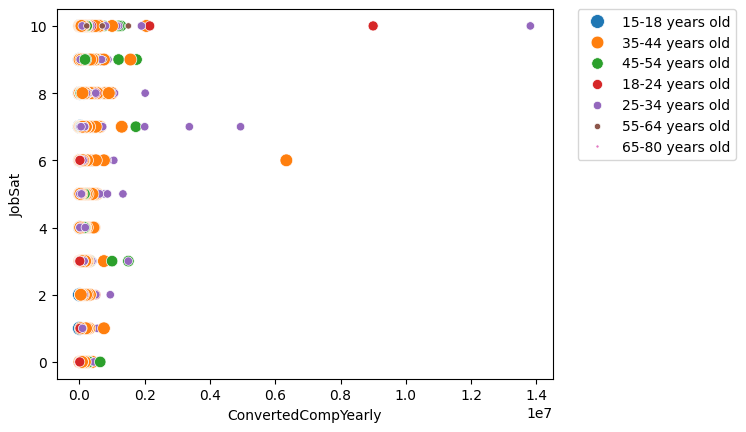

In [37]:
##Write your code here
sns.scatterplot(x='ConvertedCompYearly', y='JobSat', size='Age', hue='Age', data=dfage,
                    sizes=(5, 100), # Optional: set min and max bubble size
                    legend='full') # Optional: show legend for sizes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
plt.show() 

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_310/2154935664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfage.dropna(subset=['LanguageHaveWorkedWith'], inplace=True)
/tmp/ipykernel_310/2154935664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfage['LanguageHaveWorkedWith'] = dfage['LanguageHaveWorkedWith'].str.split(';')


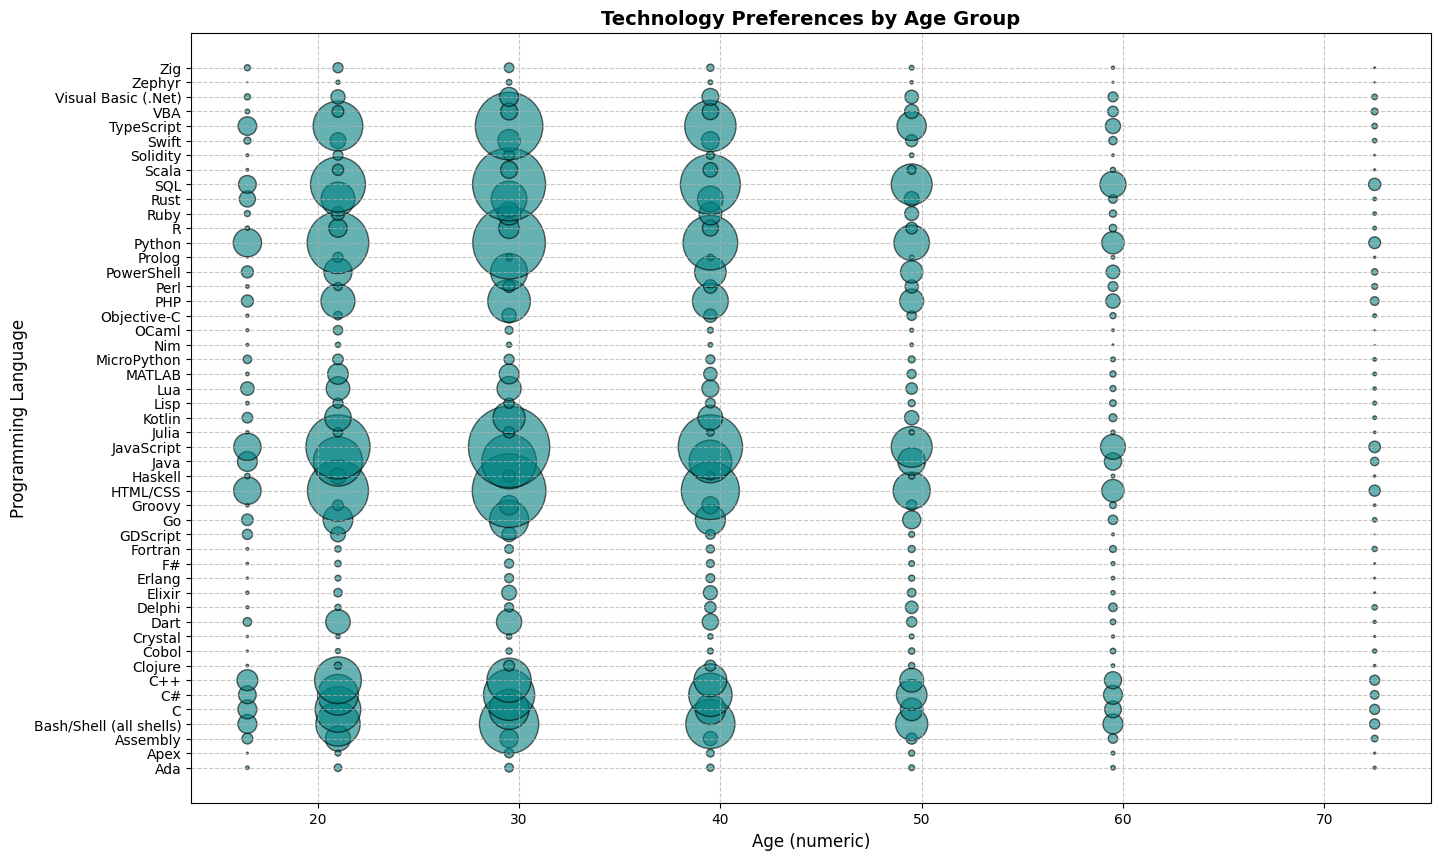

In [38]:
##Write your code here

dfage.dropna(subset=['LanguageHaveWorkedWith'], inplace=True)

# Step 2: Split languages and explode
dfage['LanguageHaveWorkedWith'] = dfage['LanguageHaveWorkedWith'].str.split(';')
dfage = dfage.explode('LanguageHaveWorkedWith')

# Step 3: Remove whitespace from language names
dfage['LanguageHaveWorkedWith'] = dfage['LanguageHaveWorkedWith'].str.strip()

language_age_group = dfage.groupby(['Age_numeric', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# Step 6: Create bubble plot
plt.figure(figsize=(16, 10))
plt.scatter(language_age_group['Age_numeric'], language_age_group['LanguageHaveWorkedWith'],
            s=language_age_group['Frequency']/4, alpha=0.6, c='teal', edgecolors='k')

# Step 7: Add labels and title
plt.xlabel('Age (numeric)', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.title('Technology Preferences by Age Group', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


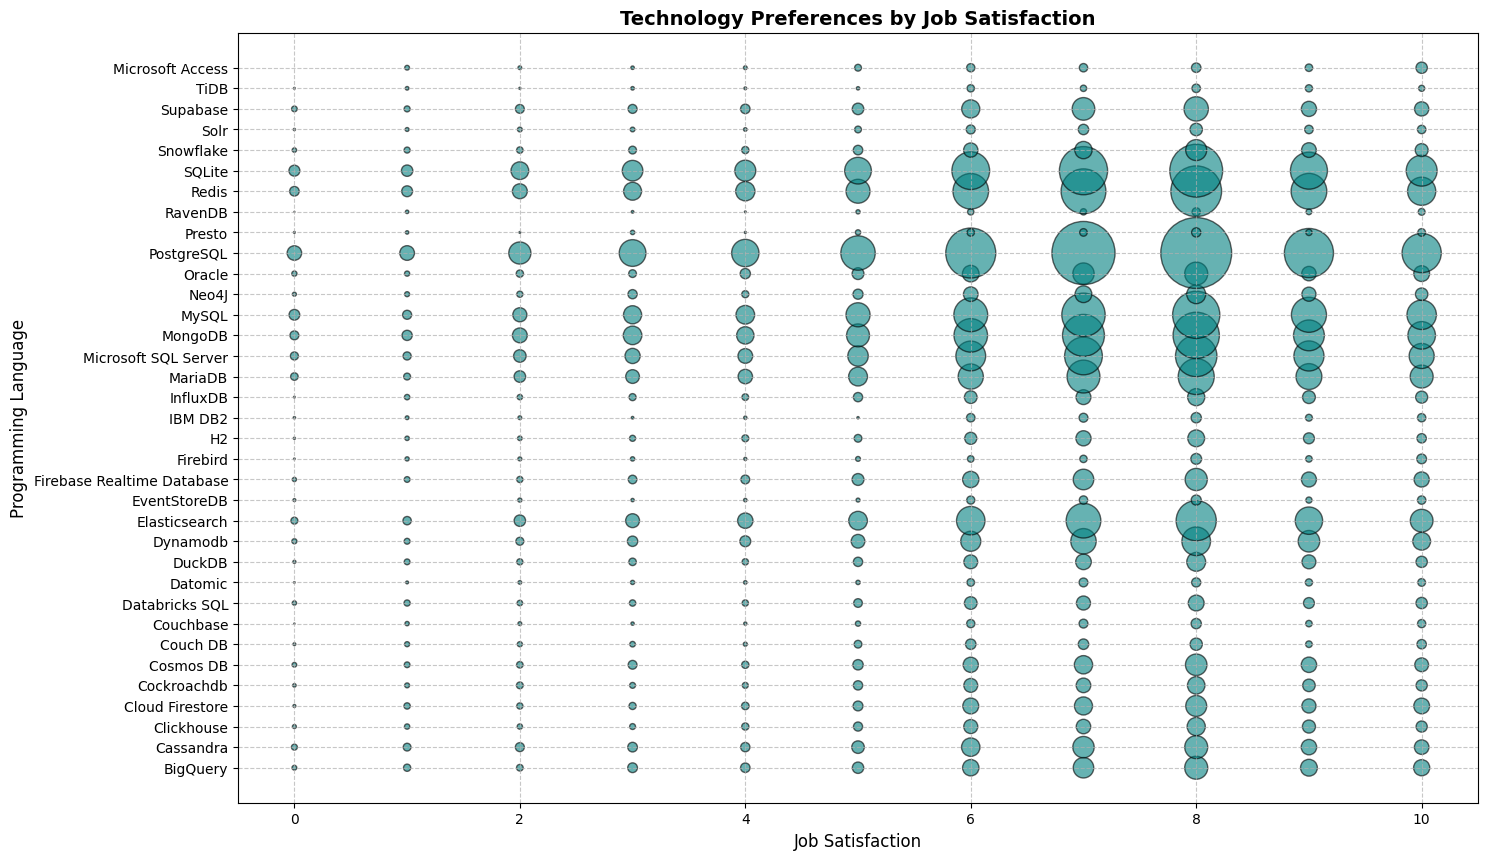

In [39]:
##Write your code here

dfage.dropna(subset=['DatabaseWantToWorkWith'], inplace=True)

# Step 2: Split languages and explode
dfage['DatabaseWantToWorkWith'] = dfage['DatabaseWantToWorkWith'].str.split(';')
dfage = dfage.explode('DatabaseWantToWorkWith')

# Step 3: Remove whitespace from language names
dfage['DatabaseWantToWorkWith'] = dfage['DatabaseWantToWorkWith'].str.strip()

database_satisfaction_group = dfage.groupby(['JobSat', 'DatabaseWantToWorkWith']).size().reset_index(name='Frequency')

# Step 6: Create bubble plot
plt.figure(figsize=(16, 10))
plt.scatter(database_satisfaction_group['JobSat'], database_satisfaction_group['DatabaseWantToWorkWith'],
            s=database_satisfaction_group['Frequency']/8, alpha=0.6, c='teal', edgecolors='k')

# Step 7: Add labels and title
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.title('Technology Preferences by Job Satisfaction', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


/tmp/ipykernel_310/327474975.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/tmp/ipykernel_310/327474975.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


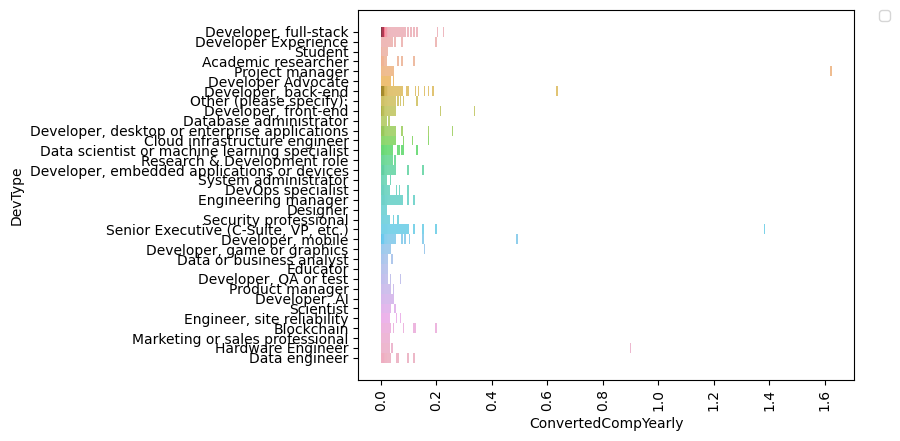

In [40]:
##Write your code here
ax=sns.histplot(data=df, x="ConvertedCompYearly", y='DevType', hue='DevType')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [41]:
dfage.dropna(subset=['NEWCollabToolsHaveWorkedWith'], inplace=True)

In [42]:
df_filt = dfage[['Age','Age_numeric', 'NEWCollabToolsHaveWorkedWith']].copy() 
df_filt

,Age,Age_numeric,NEWCollabToolsHaveWorkedWith
1,35-44 years old,39.5,PyCharm;Visual Studio Code;WebStorm
1,35-44 years old,39.5,PyCharm;Visual Studio Code;WebStorm
1,35-44 years old,39.5,PyCharm;Visual Studio Code;WebStorm
1,35-44 years old,39.5,PyCharm;Visual Studio Code;WebStorm
1,35-44 years old,39.5,PyCharm;Visual Studio Code;WebStorm
...,...,...,...
65436,18-24 years old,21.0,Visual Studio Code
65436,18-24 years old,21.0,Visual Studio Code
65436,18-24 years old,21.0,Visual Studio Code
65436,18-24 years old,21.0,Visual Studio Code


In [43]:
df_filt['NEWCollabToolsHaveWorkedWith'] = df_filt['NEWCollabToolsHaveWorkedWith'].str.split(';')

In [44]:
df_filt = df_filt.explode('NEWCollabToolsHaveWorkedWith')

In [45]:
df_filt['NEWCollabToolsHaveWorkedWith'] = df_filt['NEWCollabToolsHaveWorkedWith'].str.strip()

In [46]:
collabage_group = df_filt.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')
collabage_group 

,Age,NEWCollabToolsHaveWorkedWith,Frequency
0,15-18 years old,Android Studio,9431
1,15-18 years old,BBEdit,275
2,15-18 years old,CLion,2987
3,15-18 years old,Code::Blocks,1941
4,15-18 years old,DataGrip,1467
...,...,...,...
240,65-80 years old,Vim,2956
241,65-80 years old,Visual Studio,3713
242,65-80 years old,Visual Studio Code,5136
243,65-80 years old,WebStorm,1979


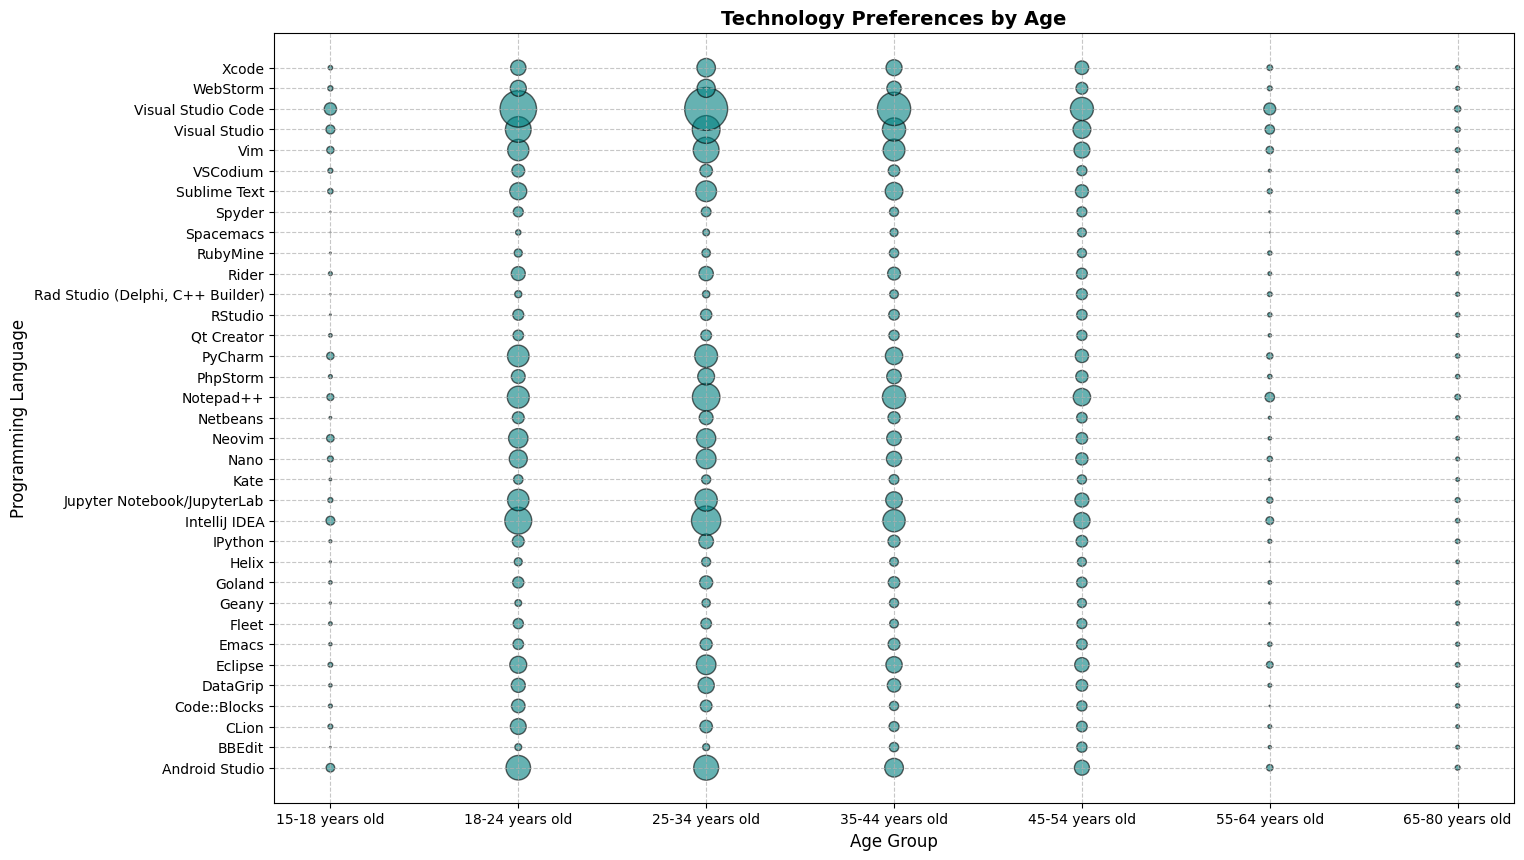

In [55]:
# Step 6: Create bubble plot
plt.figure(figsize=(16, 10))
plt.scatter(collabage_group['Age'], collabage_group['NEWCollabToolsHaveWorkedWith'],
            s=collabage_group['Frequency']/250, alpha=0.6, c='teal', edgecolors='k')

# Step 7: Add labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.title('Technology Preferences by Age', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [56]:
##Write your code here
dfage.dropna(subset=['WebframeWantToWorkWith'], inplace=True)

In [57]:
df_filt = dfage[['JobSat', 'WebframeWantToWorkWith']].copy() 
df_filt

,JobSat,WebframeWantToWorkWith
1,NaN,Express;Htmx;Node.js;React;Remix
1,NaN,Express;Htmx;Node.js;React;Remix
1,NaN,Express;Htmx;Node.js;React;Remix
1,NaN,Express;Htmx;Node.js;React;Remix
1,NaN,Express;Htmx;Node.js;React;Remix
...,...,...
65436,NaN,Django;Express;Next.js;Node.js;React
65436,NaN,Django;Express;Next.js;Node.js;React
65436,NaN,Django;Express;Next.js;Node.js;React
65436,NaN,Django;Express;Next.js;Node.js;React


In [58]:
df_filt['WebframeWantToWorkWith'] = df_filt['WebframeWantToWorkWith'].str.split(';')

In [59]:
df_filt = df_filt.explode('WebframeWantToWorkWith')

In [60]:
df_filt['WebframeWantToWorkWith'] = df_filt['WebframeWantToWorkWith'].str.strip()

In [62]:
web_group = df_filt.groupby(['JobSat', 'WebframeWantToWorkWith']).size().reset_index(name='Frequency')
web_group 

,JobSat,WebframeWantToWorkWith,Frequency
0,0.0,ASP.NET,538
1,0.0,ASP.NET CORE,863
2,0.0,Angular,786
3,0.0,AngularJS,283
4,0.0,Astro,350
...,...,...,...
390,10.0,Symfony,7289
391,10.0,Vue.js,14341
392,10.0,WordPress,10006
393,10.0,Yii 2,5269


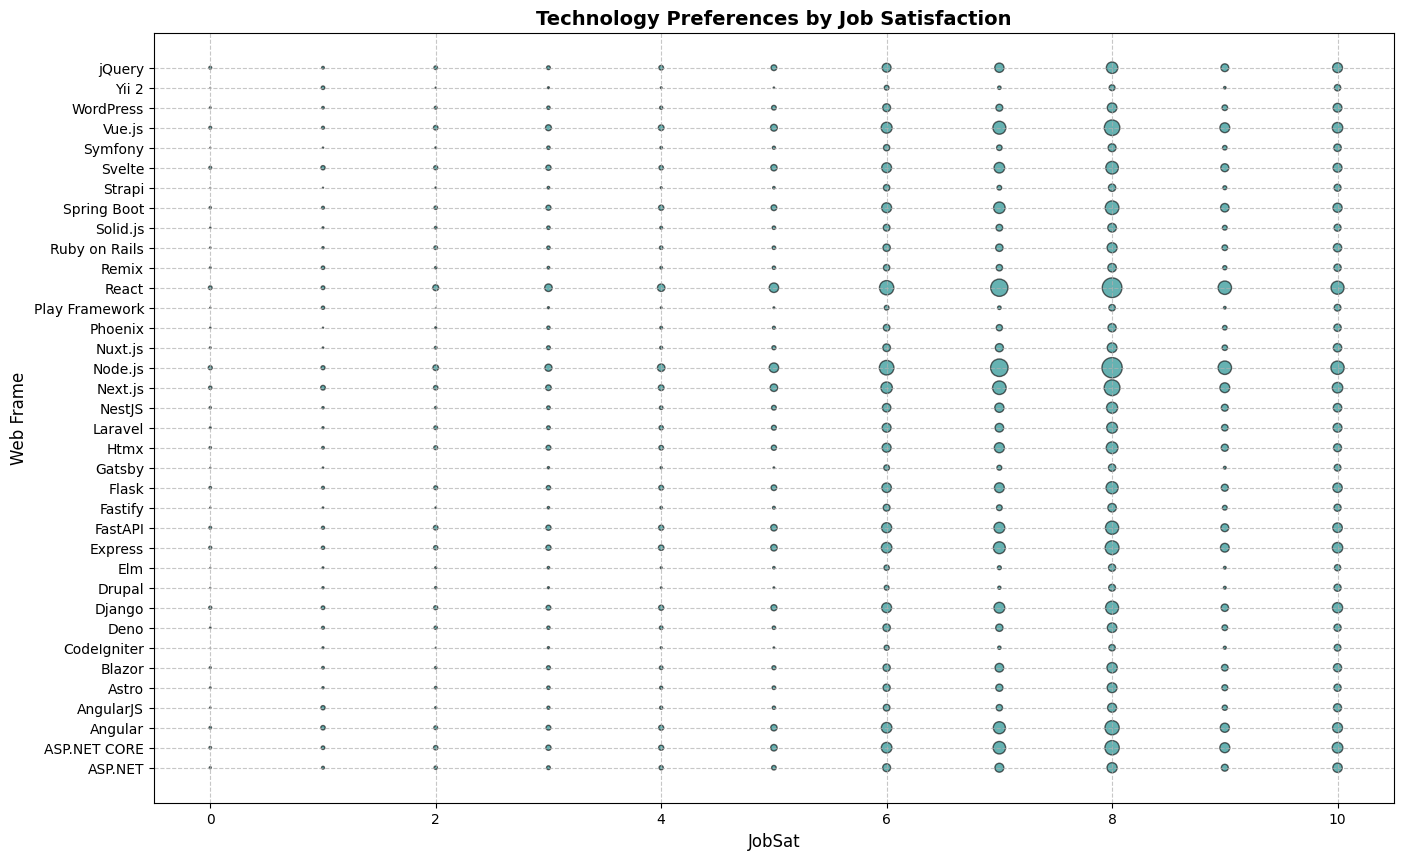

In [63]:
# Step 6: Create bubble plot
plt.figure(figsize=(16, 10))
plt.scatter(web_group['JobSat'], web_group['WebframeWantToWorkWith'],
            s=web_group['Frequency']/250, alpha=0.6, c='teal', edgecolors='k')

# Step 7: Add labels and title
plt.xlabel('JobSat', fontsize=12)
plt.ylabel('Web Frame', fontsize=12)
plt.title('Technology Preferences by Job Satisfaction', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [64]:
##Write your code here
dfage.dropna(subset=['LanguageAdmired'], inplace=True)

In [65]:
top_countries = dfage['Country'].value_counts().head(10).index
dffilt = dfage[dfage['Country'].isin(top_countries)]
dffilt

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_numeric
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,39.5
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,39.5
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,39.5
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,39.5
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65408,65409,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5
65408,65409,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5
65408,65409,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5
65408,65409,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5


In [67]:
dfnew = dffilt[['Country', 'LanguageAdmired']].copy() 
dfnew

,Country,LanguageAdmired
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
...,...,...
65408,France,Python;SQL
65408,France,Python;SQL
65408,France,Python;SQL
65408,France,Python;SQL


In [68]:
dfnew['LanguageAdmired'] = dfnew['LanguageAdmired'].str.split(';')

In [69]:
dfnew= dfnew.explode('LanguageAdmired')

In [70]:
dfnew['LanguageAdmired'] = dfnew['LanguageAdmired'].str.strip()

In [71]:
lang_group = dfnew.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Frequency')
lang_group 

,Country,LanguageAdmired,Frequency
0,Brazil,Ada,249
1,Brazil,Apex,473
2,Brazil,Assembly,670
3,Brazil,Bash/Shell (all shells),6973
4,Brazil,C,2574
...,...,...,...
468,United States of America,TypeScript,54162
469,United States of America,VBA,3784
470,United States of America,Visual Basic (.Net),5902
471,United States of America,Zephyr,2551


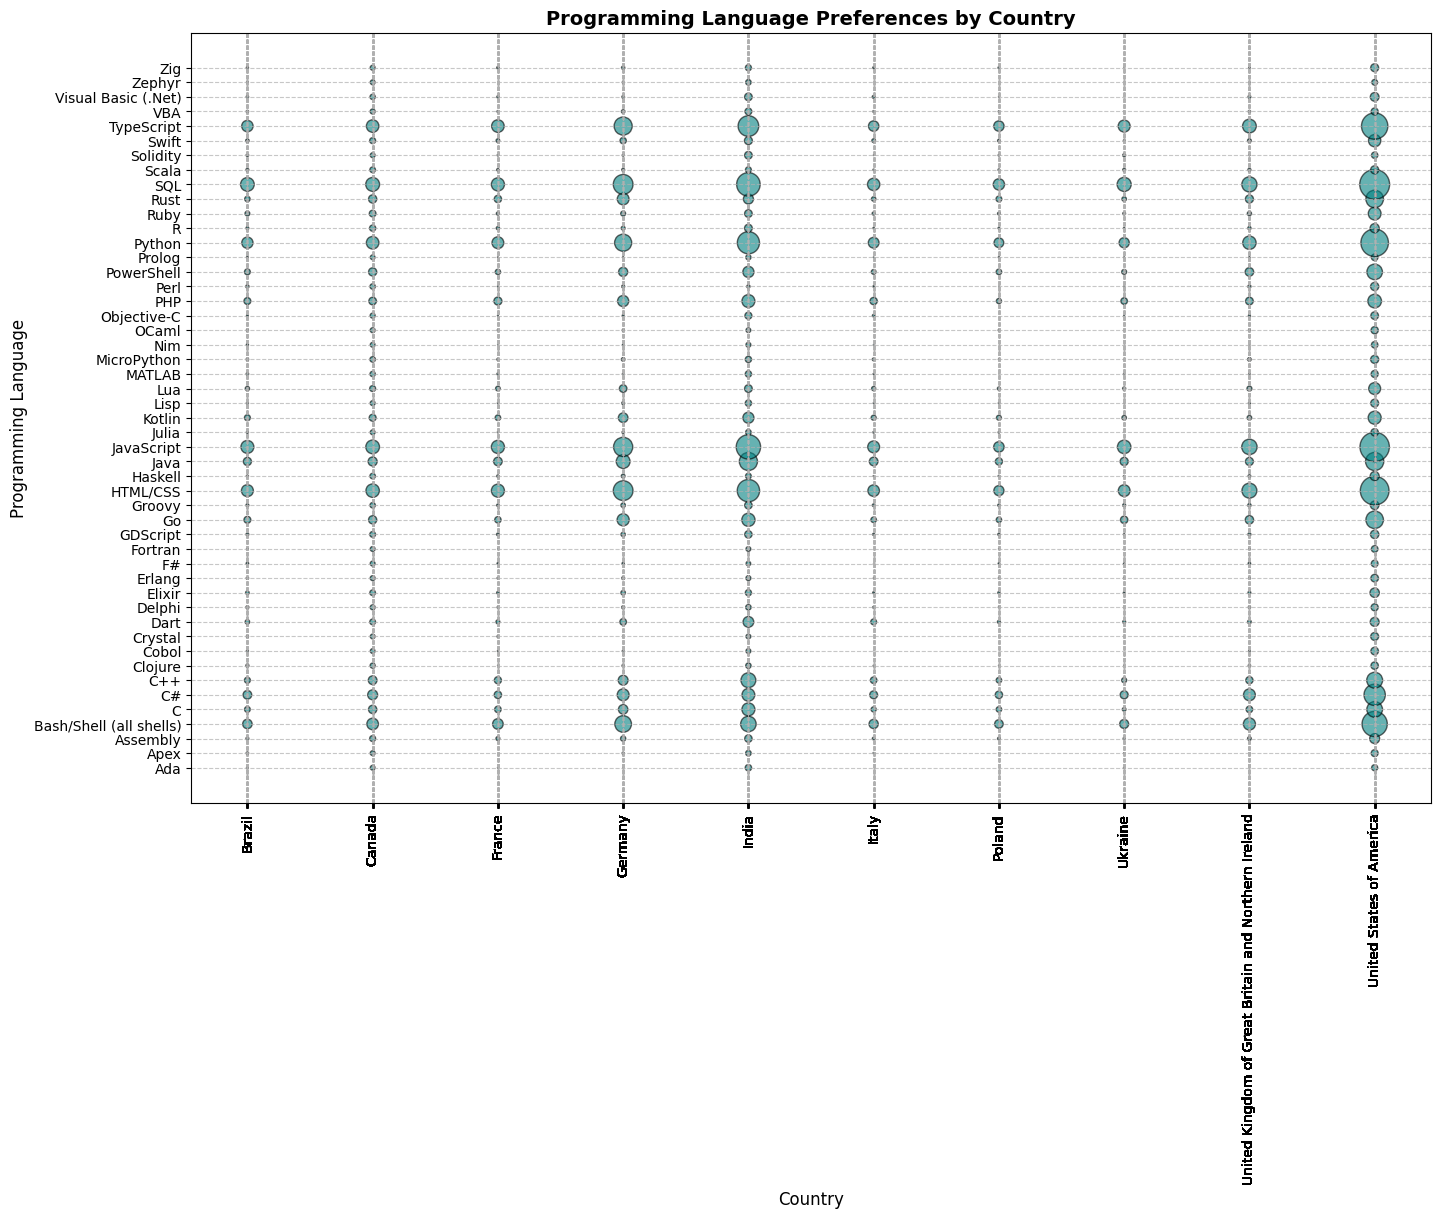

In [77]:
# Step 6: Create bubble plot
plt.figure(figsize=(16, 10))
plt.scatter(lang_group['Country'], lang_group['LanguageAdmired'],
            s=lang_group['Frequency']/150, alpha=0.6, c='teal', edgecolors='k')

# Step 7: Add labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.title('Programming Language Preferences by Country', fontsize=14, fontweight='bold')
plt.xticks(lang_group['Country'], rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
